# Business Problem : 

### 1. Import libraries for EDA

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

### 2. Read the CSV file and see a glimpse of it.

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


### 3. Statistical Summary

In [3]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [4]:
df.describe(include = "object")

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


### 4. Checking DataTypes and missing Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


- There are 12 features with 19104 datapoints.
- Data for every dirver is present in multiple rows which need to be grouped and aggreagated.
- Unnamed : 0 column is also needs to be removed.
- Features like MMM-YY, Dateofjoining, LastWorkingDate are object datatype that needs to be converted to Datetime DataType.

### Attributes where missing values are present

In [6]:
missing = pd.DataFrame(data = ((df.isnull().sum()[df.isnull().sum() > 0] /  len(df) * 100).round(2))).reset_index()
missing.columns = ['Feature', 'Percentage of missing values']

missing

,Feature,Percentage of missing values
0,Age,0.32
1,Gender,0.27
2,LastWorkingDate,91.54


In [7]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [8]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

## Insights
- The columns 'Unnamed : 0' is useless.
- The mean and median age of drivers is approximately 34 years.
- The mean and median education level for dirvers is around 1
- The median income for drivers is 60k. The mean income is slightly more so income might be skewed.
- The median Grade provided to dirvers is 2.
- There is a huge gap between mean and median of total business value, meaning some dirvers are underperforming.
- The mean quaterly rating is around 2.

## 2. Feature Engineering and Grouping things togather

In [9]:
has_inc = df.groupby('Driver_ID')['Income'].apply(lambda x: x.max() > x.min())
has_inc = has_inc.reset_index()
has_inc['has_sal_increased'] = has_inc['Income'].map({False : 0, True : 1})
has_inc.drop('Income', axis = 1, inplace=True)
has_inc

,Driver_ID,has_sal_increased
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
...,...,...
2376,2784,0
2377,2785,0
2378,2786,0
2379,2787,0


In [10]:
has_r_inc = df.groupby('Driver_ID')['Quarterly Rating'].apply(lambda x: x.max() > x.min())
has_r_inc = has_r_inc.reset_index()
has_r_inc['has_r_increased'] = has_r_inc['Quarterly Rating'].map({False : 0, True : 1})
has_r_inc.drop('Quarterly Rating', axis = 1, inplace=True)
has_r_inc

,Driver_ID,has_r_increased
0,1,0
1,2,0
2,4,0
3,5,0
4,6,1
...,...,...
2376,2784,1
2377,2785,0
2378,2786,1
2379,2787,1


### 1. Column which tells has diver left the company

In [11]:
agg_dict = {
    'MMM-YY' : 'last',
    'Age' : 'max',
    'Gender' : 'last',
    'City' : 'last',
    'Education_Level' : 'max',
    'Income' : 'last',
    'Dateofjoining' : 'first',
    'LastWorkingDate' : 'last',
    'Joining Designation' : 'first',
    'Grade' : 'last',
    'Total Business Value' : 'sum',
    'Quarterly Rating' : 'last'
}

In [12]:
df_grouped = df.groupby('Driver_ID').aggregate(agg_dict)
t = pd.merge(df_grouped, has_inc, how = 'inner', on = 'Driver_ID')
df_grouped = pd.merge(t, has_r_inc, on = 'Driver_ID', how = 'inner')
df_grouped['LastWorkingDate'] = df_grouped['LastWorkingDate'].fillna(0)
df_grouped['has_left'] = df_grouped['LastWorkingDate'].apply(lambda x : 0 if x == 0 else 1)

df_grouped

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,has_sal_increased,has_r_increased,has_left
0,1,2019-03-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11 00:00:00,1,1,1715580,2,0,0,1
1,2,2020-12-01,31.0,0.0,C7,2,67016,2020-11-06,0,2,2,0,1,0,0,0
2,4,2020-04-01,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27 00:00:00,2,2,350000,1,0,0,1
3,5,2019-03-01,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07 00:00:00,1,1,120360,1,0,0,1
4,6,2020-12-01,31.0,1.0,C11,1,78728,2020-07-31,0,3,3,1265000,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,2020-12-01,34.0,0.0,C24,0,82815,2015-10-15,0,2,3,21748820,4,0,1,0
2377,2785,2020-10-01,34.0,1.0,C9,0,12105,2020-08-28,2020-10-28 00:00:00,1,1,0,1,0,0,1
2378,2786,2019-09-01,45.0,0.0,C19,0,35370,2018-07-31,2019-09-22 00:00:00,2,2,2815090,1,0,1,1
2379,2787,2019-06-01,28.0,1.0,C20,2,69498,2018-07-21,2019-06-20 00:00:00,1,1,977830,1,0,1,1


In [13]:
#Value counts for target variable
df_grouped['has_left'].value_counts()

1    1616
0     765
Name: has_left, dtype: int64

In [14]:
#Validating the above frequencies
df['LastWorkingDate'].value_counts().sum()

1616

In [15]:
BOLD = '\033[1m'
END = '\033[0m'

In [16]:
for col in df_grouped.columns:
    if df_grouped[col].dtype == 'object' or len(df_grouped[col].value_counts()) < 10:
        print(f"*************** The value count for {BOLD}{col}{END} is *****************\n")
        
        print((df_grouped[col].value_counts(normalize=True) * 100).round(2),'\n')

*************** The value count for Gender is *****************

0.0    58.97
1.0    41.03
Name: Gender, dtype: float64 

*************** The value count for City is *****************

C20    6.38
C15    4.24
C29    4.03
C26    3.91
C8     3.74
C27    3.74
C10    3.61
C16    3.53
C22    3.44
C3     3.44
C28    3.44
C12    3.40
C5     3.36
C1     3.36
C21    3.32
C14    3.32
C6     3.28
C4     3.23
C7     3.19
C9     3.15
C25    3.11
C23    3.11
C24    3.07
C19    3.02
C2     3.02
C17    2.98
C13    2.98
C18    2.90
C11    2.69
Name: City, dtype: float64 

*************** The value count for Education_Level is *****************

2    33.68
1    33.39
0    32.93
Name: Education_Level, dtype: float64 

*************** The value count for LastWorkingDate is *****************

0                      32.13
2020-07-29 00:00:00     2.94
2019-09-22 00:00:00     1.09
2019-03-17 00:00:00     0.59
2020-11-28 00:00:00     0.55
                       ...  
2019-06-16 00:00:00     0.04
2020-11-17 00:

## Insights :
- The most drivers are from city 'C20' being 6.38% and the least number of drivers are in ctiy 'C11' only 2.69%.
- 67.87% of the customers leaves the company and only 32% remains in it as of 2019.
- For 54% of the drivers the rating has increased and for 46% the rating has not incresed.
- 73% drivers belongs to rating 1, 15% belongs to rating 2, 7% for rating 3 and only 4.49% has Quarterly rating 4.
- Only 1.01% of the drivers are Grade 5, 35,31,26,5.80 for 2,1,3 and 4 respectively.
- For 43% of drivers the joining designation is 1, 34% for 2 and 20% for 3, for designation 4 and 5 their driver count is less than 2 percent.
- Nearly 59% of the drivers belongs to gender 0 and 41% to gender 1.


### Applying Chi square test to check wheather a feature is import with respect to churning.

In [17]:
def is_independent(data,f1, f2 = 'has_left', ):
    
    cont_table = pd.crosstab(index = data[f1], columns = data[f2])
    t,p_val,ddof, exp = chi2_contingency(cont_table)
    print(f"{BOLD}*********** Chi square test of independence on {f1} and churning ***************{END}")
    print(f"The null hypothesis is churning is independet of {f1}")
    print(f"The alternate hypothesis is churning is dependent of {f1}")
    print(f"The {BOLD}5%{END} significance level we can conclude that : ")
    if p_val > 0.05:
        print(f"Churning is {BOLD}INDEPENDENT{END} of {f1}")
    else:
        print(f"Churning is {BOLD}DEPENDENT{BOLD} of {f1}")
    print('\n\n')
        

test_features = ['City','Gender','Education_Level','Joining Designation', 'Grade', 'Quarterly Rating','has_sal_increased', 'has_r_increased','Age' ]
        
for feature in test_features:
    is_independent(df_grouped, feature)
    


*********** Chi square test of independence on City and churning ***************
The null hypothesis is churning is independet of City
The alternate hypothesis is churning is dependent of City
The 5% significance level we can conclude that : 
Churning is DEPENDENT of City



*********** Chi square test of independence on Gender and churning ***************
The null hypothesis is churning is independet of Gender
The alternate hypothesis is churning is dependent of Gender
The 5% significance level we can conclude that : 
Churning is INDEPENDENT of Gender



*********** Chi square test of independence on Education_Level and churning ***************
The null hypothesis is churning is independet of Education_Level
The alternate hypothesis is churning is dependent of Education_Level
The 5% significance level we can conclude that : 
Churning is INDEPENDENT of Education_Level



*********** Chi square test of independence on Joining Designation and churning ***************
The null hypothesis 

### From the above test we can conclude that churning is 
    - Independent of GENDER and EDUCATION LEVEL.
    - Dependent of CITY, JOINING DESIGNATION, GRADE, QUARTERLY RATING , weather their SALARY HAS INCREASED and RATING HAS INCREASED.

## Graphical Analysis

C:\Users\yasee\AppData\Local\Temp\ipykernel_16796\2668649299.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_grouped.corr(method = 'pearson'),annot=True)


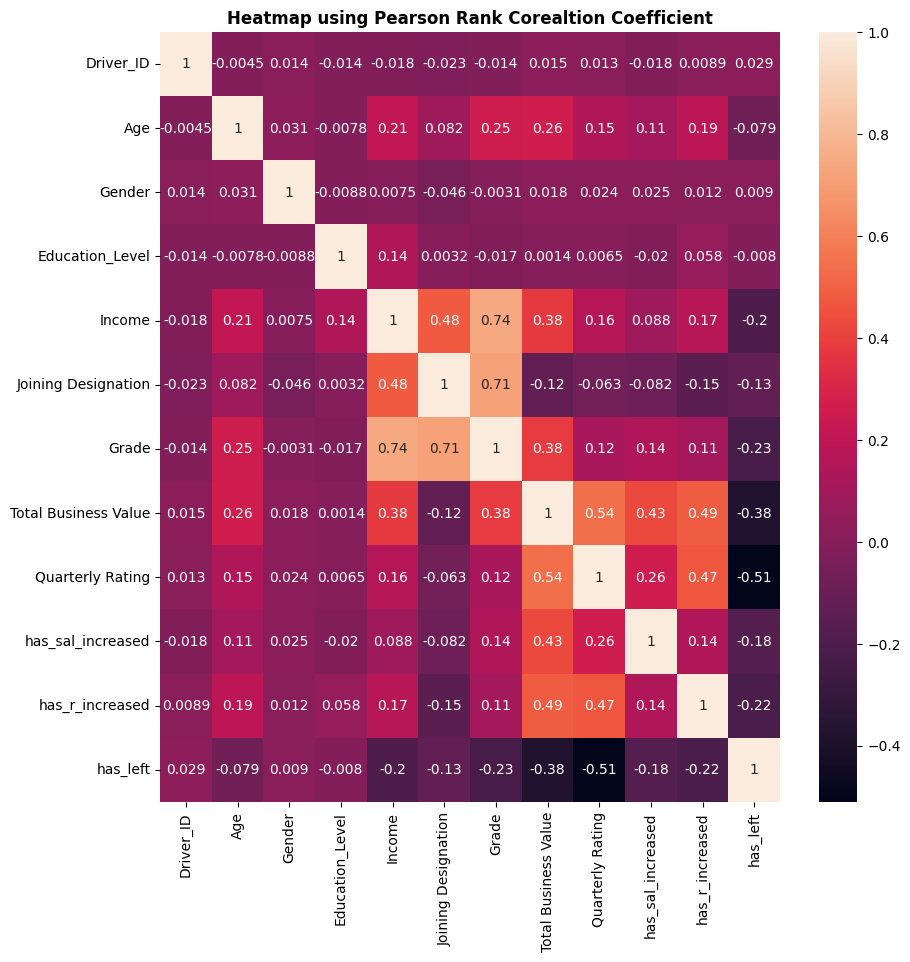

In [18]:
plt.figure(figsize = (10,10))
sns.heatmap(df_grouped.corr(method = 'pearson'),annot=True)
plt.title(f"Heatmap using Pearson Rank Corealtion Coefficient", fontweight = 'bold')
plt.show()

C:\Users\yasee\AppData\Local\Temp\ipykernel_16796\430961271.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_grouped.corr(method = 'spearman'),annot=True)


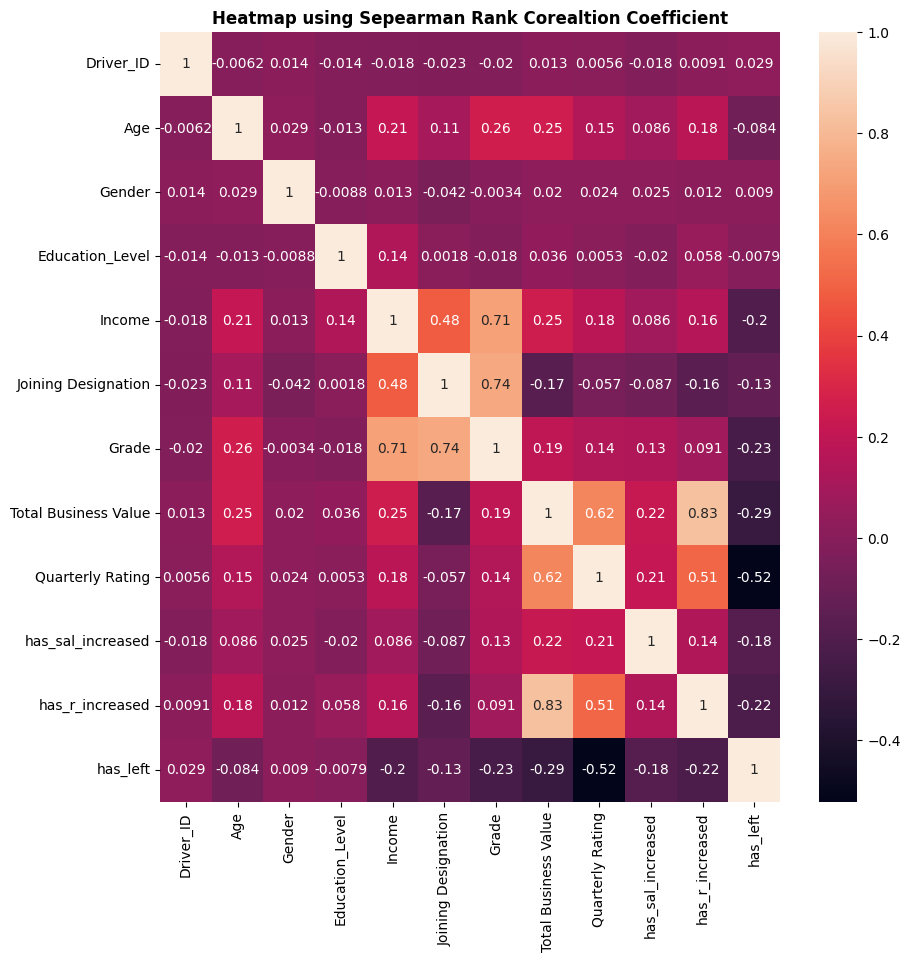

In [19]:
plt.figure(figsize = (10,10))
sns.heatmap(df_grouped.corr(method = 'spearman'),annot=True)
plt.title(f"Heatmap using Sepearman Rank Corealtion Coefficient", fontweight = 'bold')
plt.show()

In [20]:
def kde_boxplot(data, x, font_size, target=None):
    plt.figure(figsize = (20,7))
    
    plt.subplot(1,2,1)
    sns.kdeplot(data = data,
                x = x,
                hue = target
               )
    if target != None:
        plt.title(label = "Distribution of "+x+" for different "+target,
                 y = -0.2,
                 fontsize = font_size,
                 fontweight = 'bold')
    else:
        plt.title(label = "Distribution of {x}", 
                 y = -0.2,
                 fontsize = font_size,
                 fontweight = 'bold')
    plt.grid()
    
    plt.subplot(1,2,2)
    sns.boxplot(data=data,
               x = target,
               y = x)
    if target != None:
        plt.title(label = "Boxplot showing distribution of "+x+" for different "+target,
                 y = -0.2,
                 fontsize = font_size,
                 fontweight = 'bold')
    else:
        plt.title(label = "Boxplot showing distribution of "+x,
                 y = -0.2,
                 fontsize = font_size,
                 fontweight = 'bold')
        
    plt.show()
        

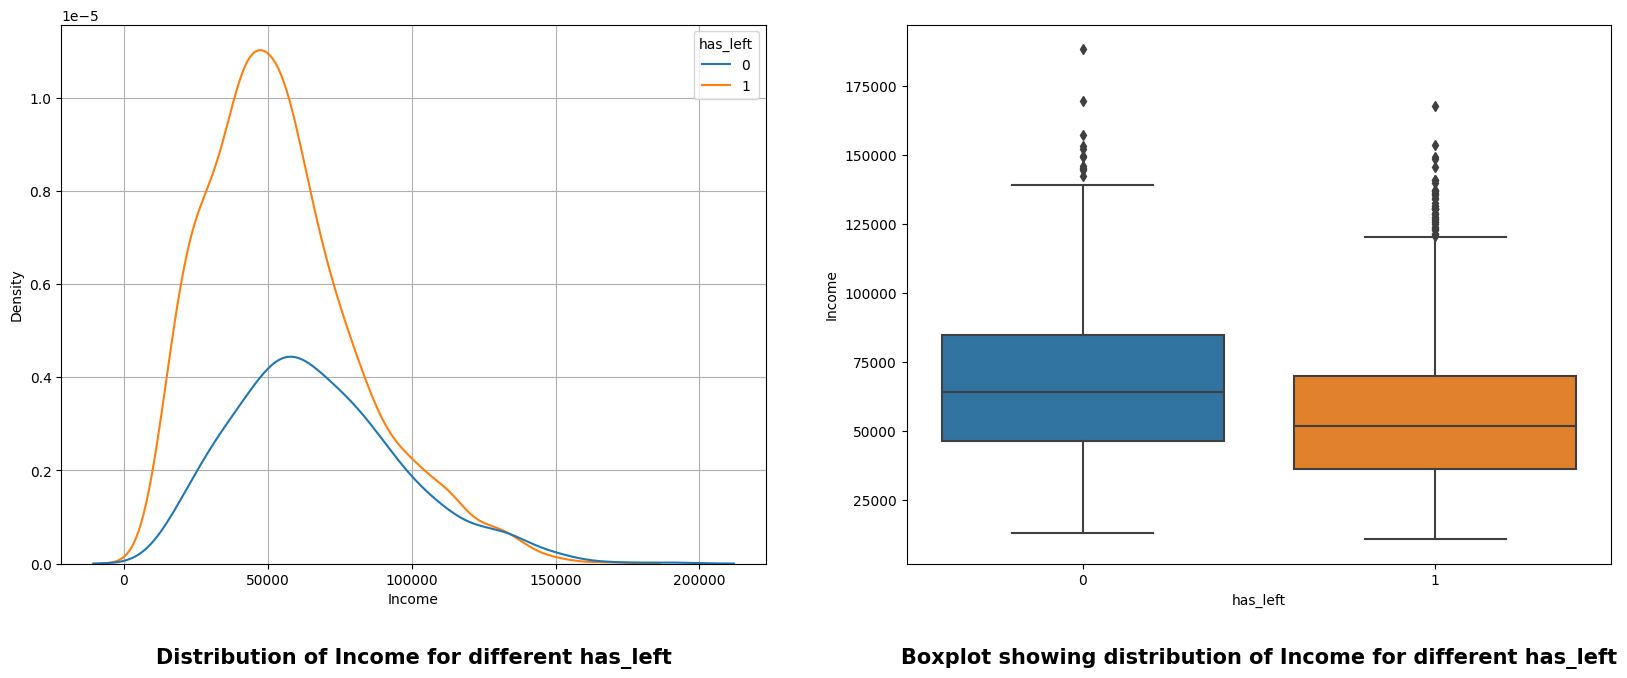

In [21]:
kde_boxplot(df_grouped, 'Income', target = 'has_left', font_size = 15)

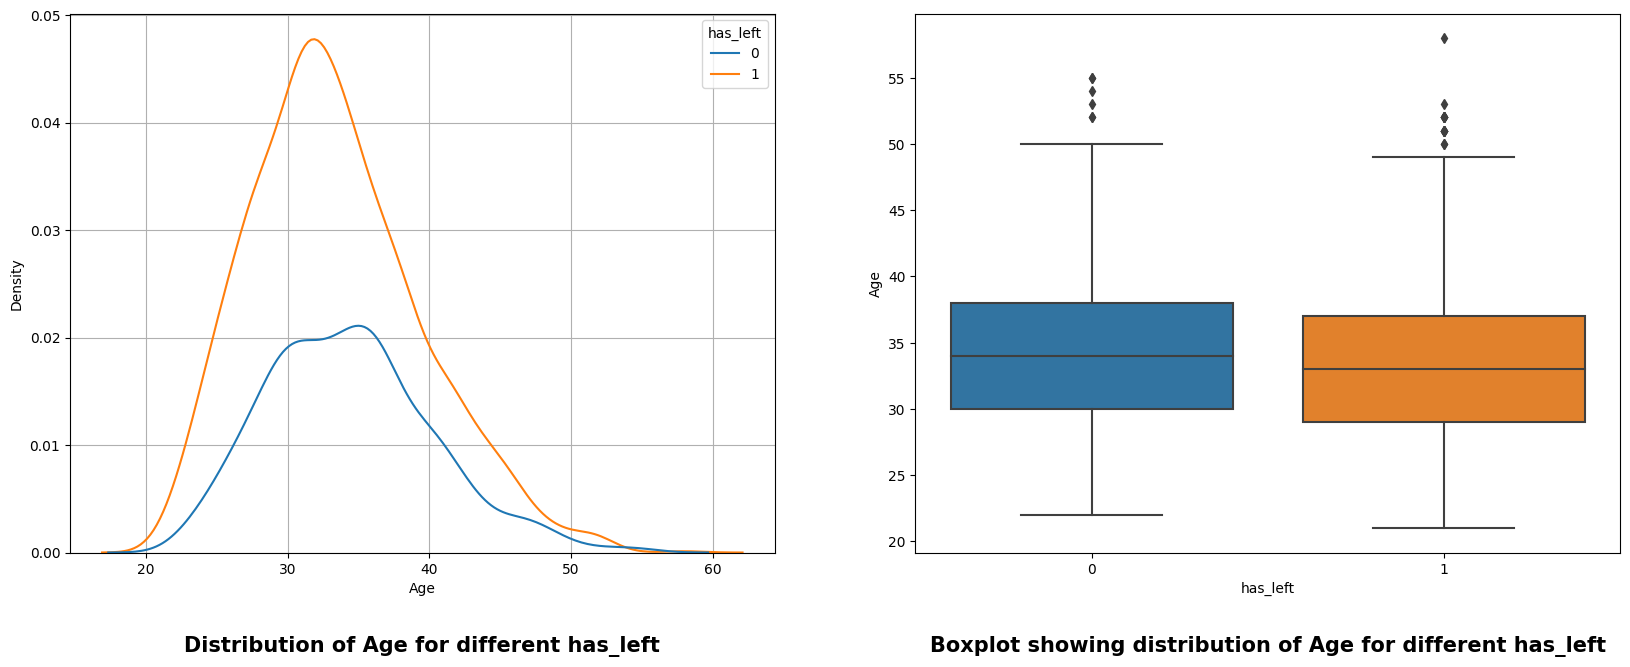

In [22]:
kde_boxplot(df_grouped, 'Age', target = 'has_left', font_size = 15)

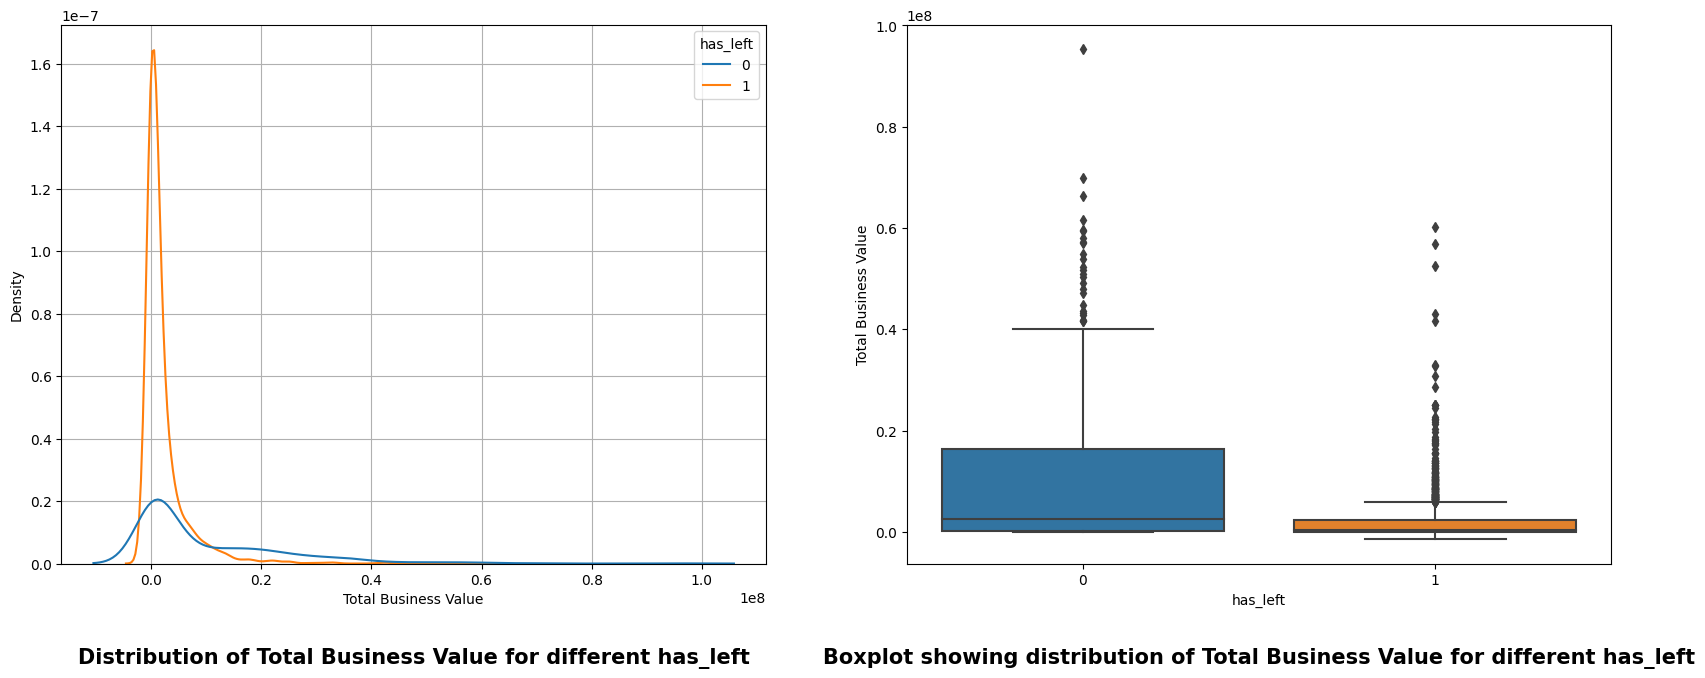

In [23]:
kde_boxplot(df_grouped, 'Total Business Value', target = 'has_left', font_size = 15)

In [24]:
def freq_plot(data, x, target = 'has_left'):
    if len(data[x].value_counts()) > 10:
        plt.figure(figsize = (15,10))
        sns.countplot(data=data, x= x, hue = target, order = df_grouped[x].value_counts().index)
        plt.xticks(rotation = 45)
    else:
        sns.countplot(data=data, x= x, hue = target)

    plt.title(f"Frequency count of churn {x} wise", fontweight = 'bold')
    plt.show()

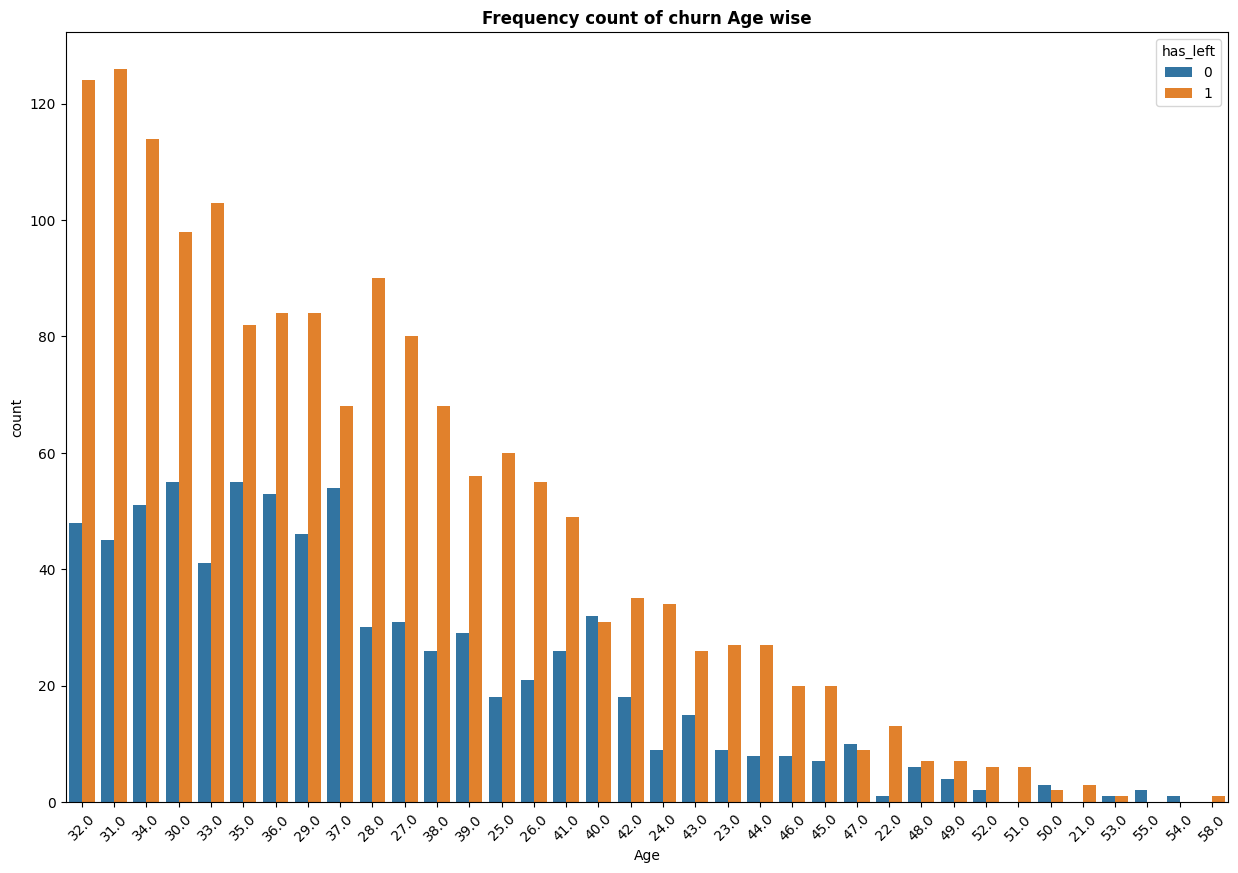

In [25]:
freq_plot(df_grouped, 'Age')

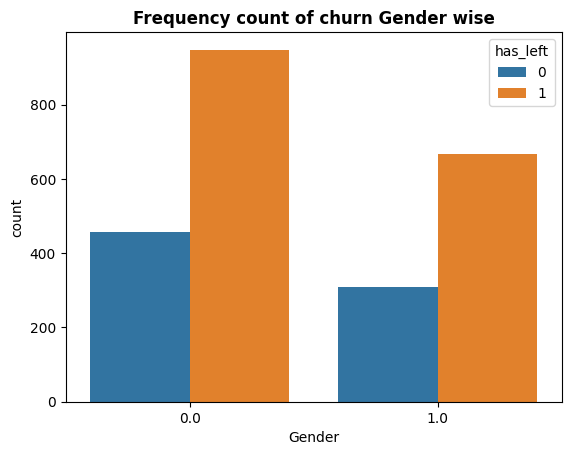

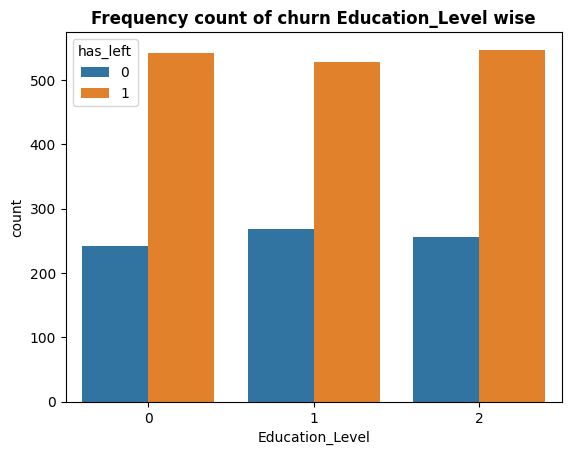

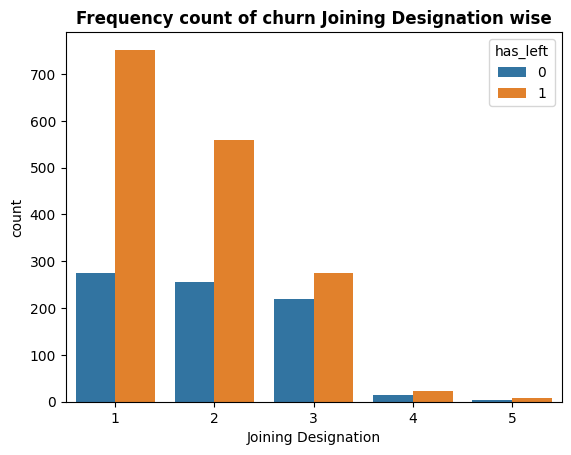

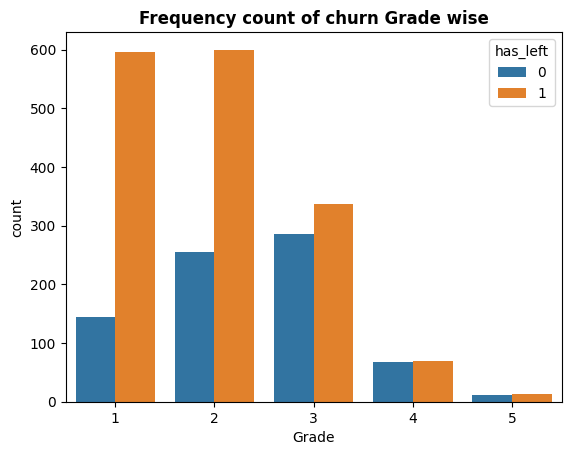

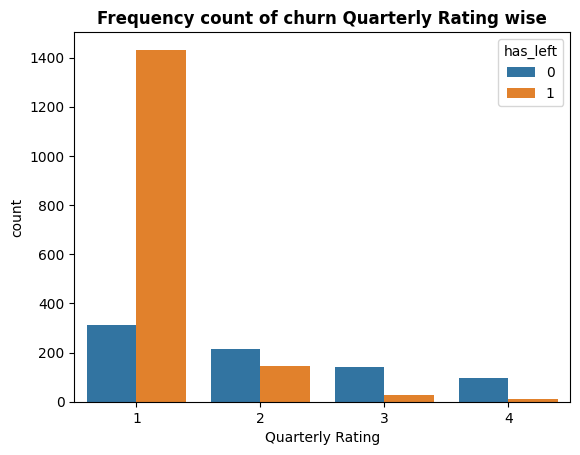

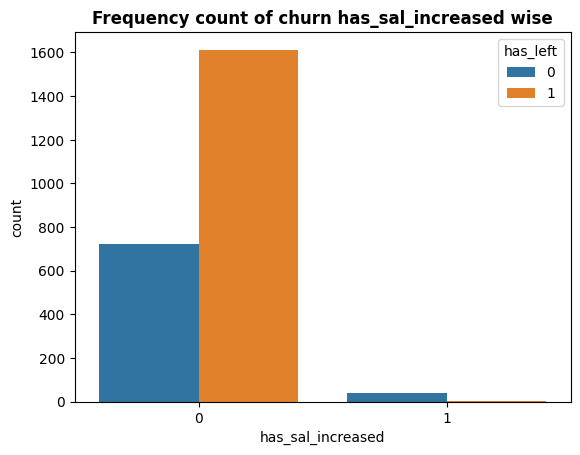

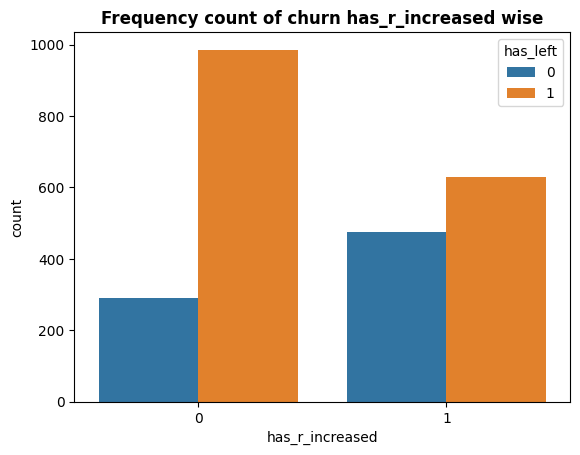

In [26]:
freq_plot(df_grouped, 'Gender')
freq_plot(df_grouped, 'Education_Level')
freq_plot(df_grouped, 'Joining Designation')
freq_plot(df_grouped, 'Grade')
freq_plot(df_grouped, 'Quarterly Rating')
freq_plot(df_grouped, 'has_sal_increased')
freq_plot(df_grouped, 'has_r_increased')

## Insights

- Churning has good correaltion with 
    - Quarterly Rating
- Churning has some correlation with
    - Weather rating has increased?
    - Weather salary has increased?
    - Grade of the driver
    - Income of the driver
- Churning also have a bad impact on total business value.

- The Median salary of people who churns is lower than those who doesn't
- The age of those dirvers who churn is also lower than those who stays with the company.
- The business value provided by those prople who churns is negligibel as compared to who stays with the company

- The age group of 27-35 includes lots of drivers who churns.
- Gender 0 has higher churning rate.
- Churning rate with respect to education level is almost the same.
- Joining Designation 1,2 and 3 have high number of drivers who churns.
- Out of grade 1-5, grade 1,2 and 3 drivers churns the most.
- Most often the drivers whose quarterly rating is one churns alot.
- Drivers without salary increament churns more than those who got salary appraisal.

## Splitting the data for model training and validation.

In [27]:
X = df_grouped.drop(['has_left','LastWorkingDate','MMM-YY', 'Driver_ID', 'Dateofjoining' ],axis=1)
y = df_grouped['has_left']

#Splitting the data
# X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size = 0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

#Checking the proportion of different classes for train and test.
# print("Proportion of target variable for train split :  \n",y_train.value_counts(normalize=True),'\n')
# print("Proportion of target variable for test split :  \n", y_test.value_counts(normalize=True),'\n')

## Encoding the data

In [28]:
from category_encoders import TargetEncoder

te_columns = ['City']
te = TargetEncoder()
X_train[te_columns] = te.fit_transform(X = X_train[te_columns], y = y_train)
X_test[te_columns] = te.transform(X_test[te_columns])

C:\Users\yasee\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\yasee\AppData\Local\Programs\Python\Python310\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


## Standardizing the data : 

In [29]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [95]:
X_train = pd.DataFrame(data = X_train, columns = X.columns)
X_test = pd.DataFrame(data = X_test, columns = X.columns)

# Model Boulding

## 1. Bagging - Random Forest

In [ ]:
# Instanciating RFC 
rfc = RandomForestClassifier(n_jobs = -1)

# Paramteter Grid for grid search
param_grid = { 
    'n_estimators' : [50, 100, 150, 200],
    'max_depth' : list(range(3,30,3)),
    'min_samples_split' : list(range(2,40,2)),
    'min_samples_leaf' : np.linspace(0,0.1,20),
    'class_weight' : ['balanced', None],
    'oob_score' : [False, True]
}

# Training on all above combinations
gs = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 4, n_jobs = -1, scoring = 'f1')
gs.fit(X_train, y_train)

In [ ]:
# Best random forest paramteres are as follow:
gs.best_estimator_

In [163]:
best_rfc = RandomForestClassifier(max_depth=6, n_estimators=50, n_jobs=-1, oob_score=True)
best_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=50, n_jobs=-1, oob_score=True)

In [164]:
y_pred_train = best_rfc.predict(X_train)
y_pred_test = best_rfc.predict(X_test)

best_rfc_summary = pd.DataFrame(data = best_rfc.feature_importances_.reshape(1,-1) , columns = X.columns)
best_rfc_summary['f1_score_train'] = f1_score(y_train, y_pred_train)
best_rfc_summary['f1_score_test'] = f1_score(y_test, y_pred_test)
best_rfc_summary['recall_score_train'] = recall_score(y_train, y_pred_train)
best_rfc_summary['recall_score_test'] = recall_score(y_test, y_pred_test)
best_rfc_summary['precision_score_train'] = precision_score(y_train, y_pred_train)
best_rfc_summary['precision_score_test'] = precision_score(y_test, y_pred_test)

In [165]:
best_rfc_summary

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,has_sal_increased,has_r_increased,f1_score_train,f1_score_test,recall_score_train,recall_score_test,precision_score_train,precision_score_test
0,0.043166,0.007749,0.06885,0.01236,0.08615,0.052476,0.064738,0.236228,0.380359,0.015879,0.032045,0.885507,0.87909,0.950973,0.933535,0.828475,0.830645


<AxesSubplot: >

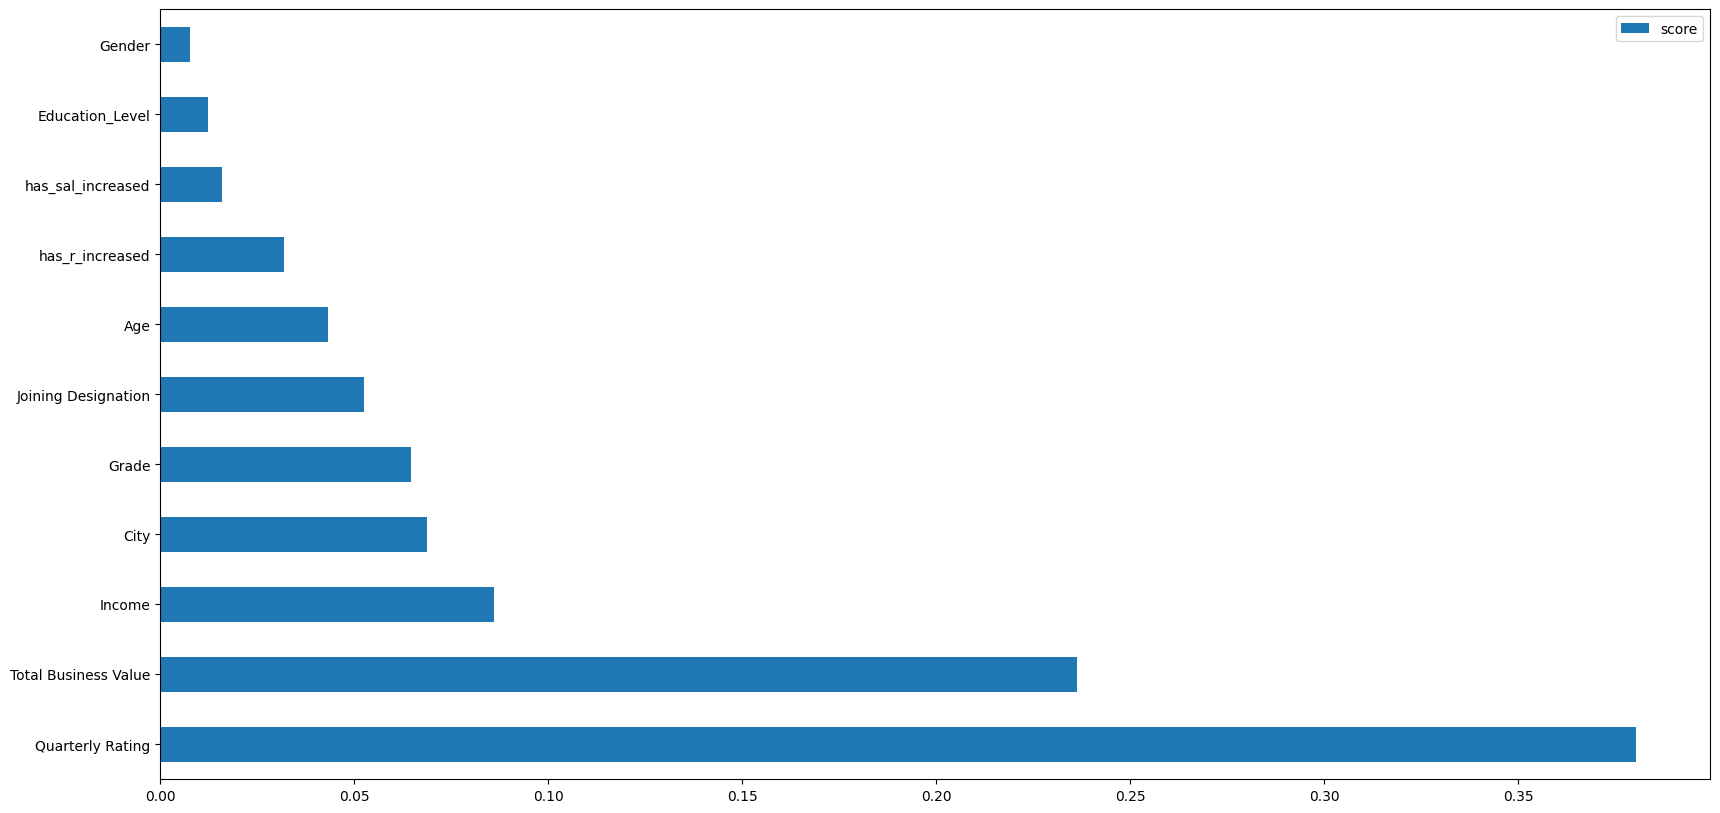

In [166]:
data = pd.DataFrame(data=best_rfc.feature_importances_, index=X.columns, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

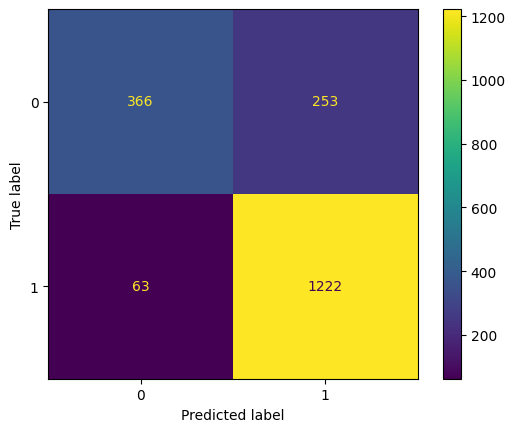

In [168]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train))
disp.plot()
plt.show()

### 2. Boosting - XGBoost

In [ ]:
xgb = XGBClassifier(n_jobs = -1)

param_grid = { 
    'n_estimators' : np.arange(10,200,10),
    # 'max_depth' : np.arange(3,30,2),
    # 'max_leaves' : [0]
}

gs_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 4, scoring = 'f1', n_jobs = -1)
gs_xgb.fit(X_train, y_train)

In [ ]:
gs_xgb.best_params_

In [156]:
best_xgb = XGBClassifier(n_estimators = 10)
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [157]:
y_pred_train = best_xgb.predict(X_train)
y_pred_test = best_xgb.predict(X_test)

xgb_summary = data.T
xgb_summary['f1_score_train'] = f1_score(y_train, y_pred_train)
xgb_summary['f1_score_test'] = f1_score(y_test, y_pred_test)
xgb_summary['recall_score_train'] = recall_score(y_train, y_pred_train)
xgb_summary['recall_score_test'] = recall_score(y_test, y_pred_test)
xgb_summary['precision_score_train'] = precision_score(y_train, y_pred_train)
xgb_summary['precision_score_test'] = precision_score(y_test, y_pred_test)

In [158]:
xgb_summary

,Quarterly Rating,Total Business Value,Income,City,Joining Designation,Grade,Age,has_r_increased,has_sal_increased,Education_Level,Gender,f1_score_train,f1_score_test,recall_score_train,recall_score_test,precision_score_train,precision_score_test
score,0.42923,0.229756,0.077666,0.063023,0.051602,0.047654,0.037934,0.025085,0.014836,0.013222,0.009992,0.901347,0.875892,0.963424,0.927492,0.846785,0.82973


<AxesSubplot: >

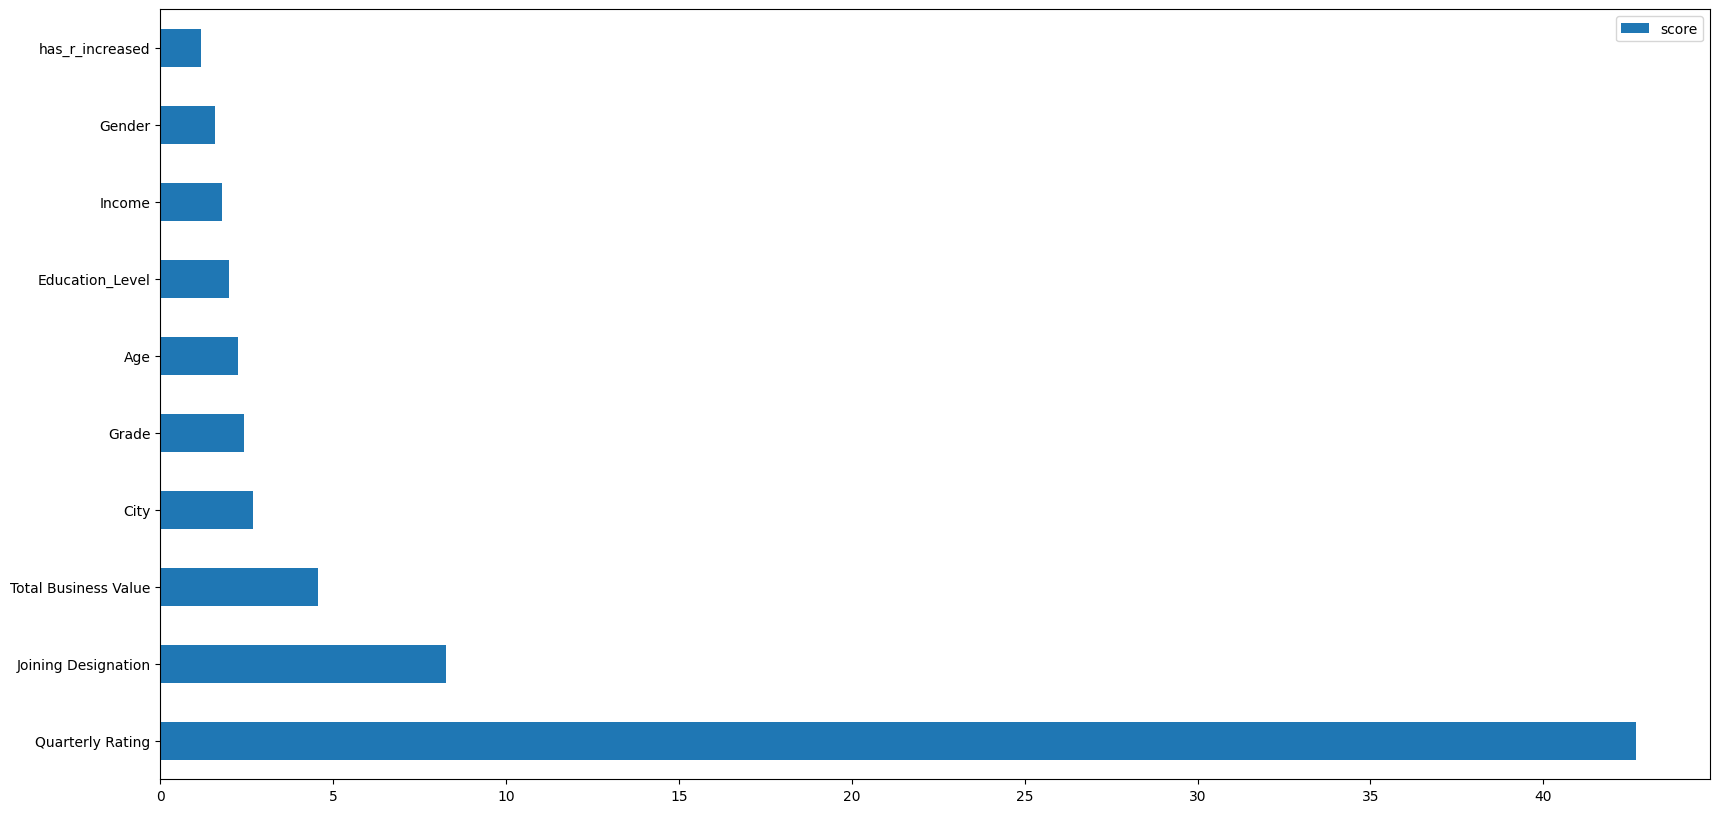

In [159]:
feature_important = best_xgb.get_booster().get_score(importance_type="gain")
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

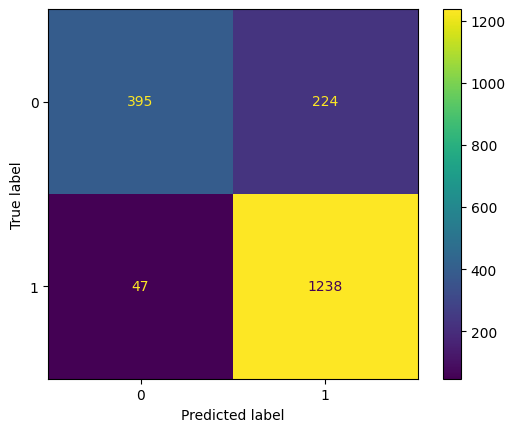

In [160]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_train))
disp.plot()
plt.show()

In [ ]:
# Insights :
- Both the model created above provides great performance on unseen data, the recall score for random forest is 93% and that of Extreme gradient boost is 92%.
- The most important parameter turns out to be quarterly rating, higher quarterly rating indicates higher chances of drivers churning the company.
- City, joining desgination, Grade of the driver are also very important with respect to churning.
- Business value also plays important role to determine churn.

In [ ]:
# Recommendations 
- Drivers should be trained before starting their journy with the company where they should learn about
    - Customer Treatment
    - Effect of cancellation or refunds on their performance measures.
    - Effect of quarterly rating and grade accociated with them.
- Responsive support from the company should be provided, if drivers have quaries or issues they need to be resolved swiftly.
- Customer satisfaction is indeed one of the most important parameter for the business but one should 

In [ ]:
y_test.value_counts()